<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [4]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [5]:
# 결측치 검사
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 2-1. 데이터 분석

### 1-0. 타겟 변수

In [6]:
terget = 'charges'

In [7]:
data[[target]].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


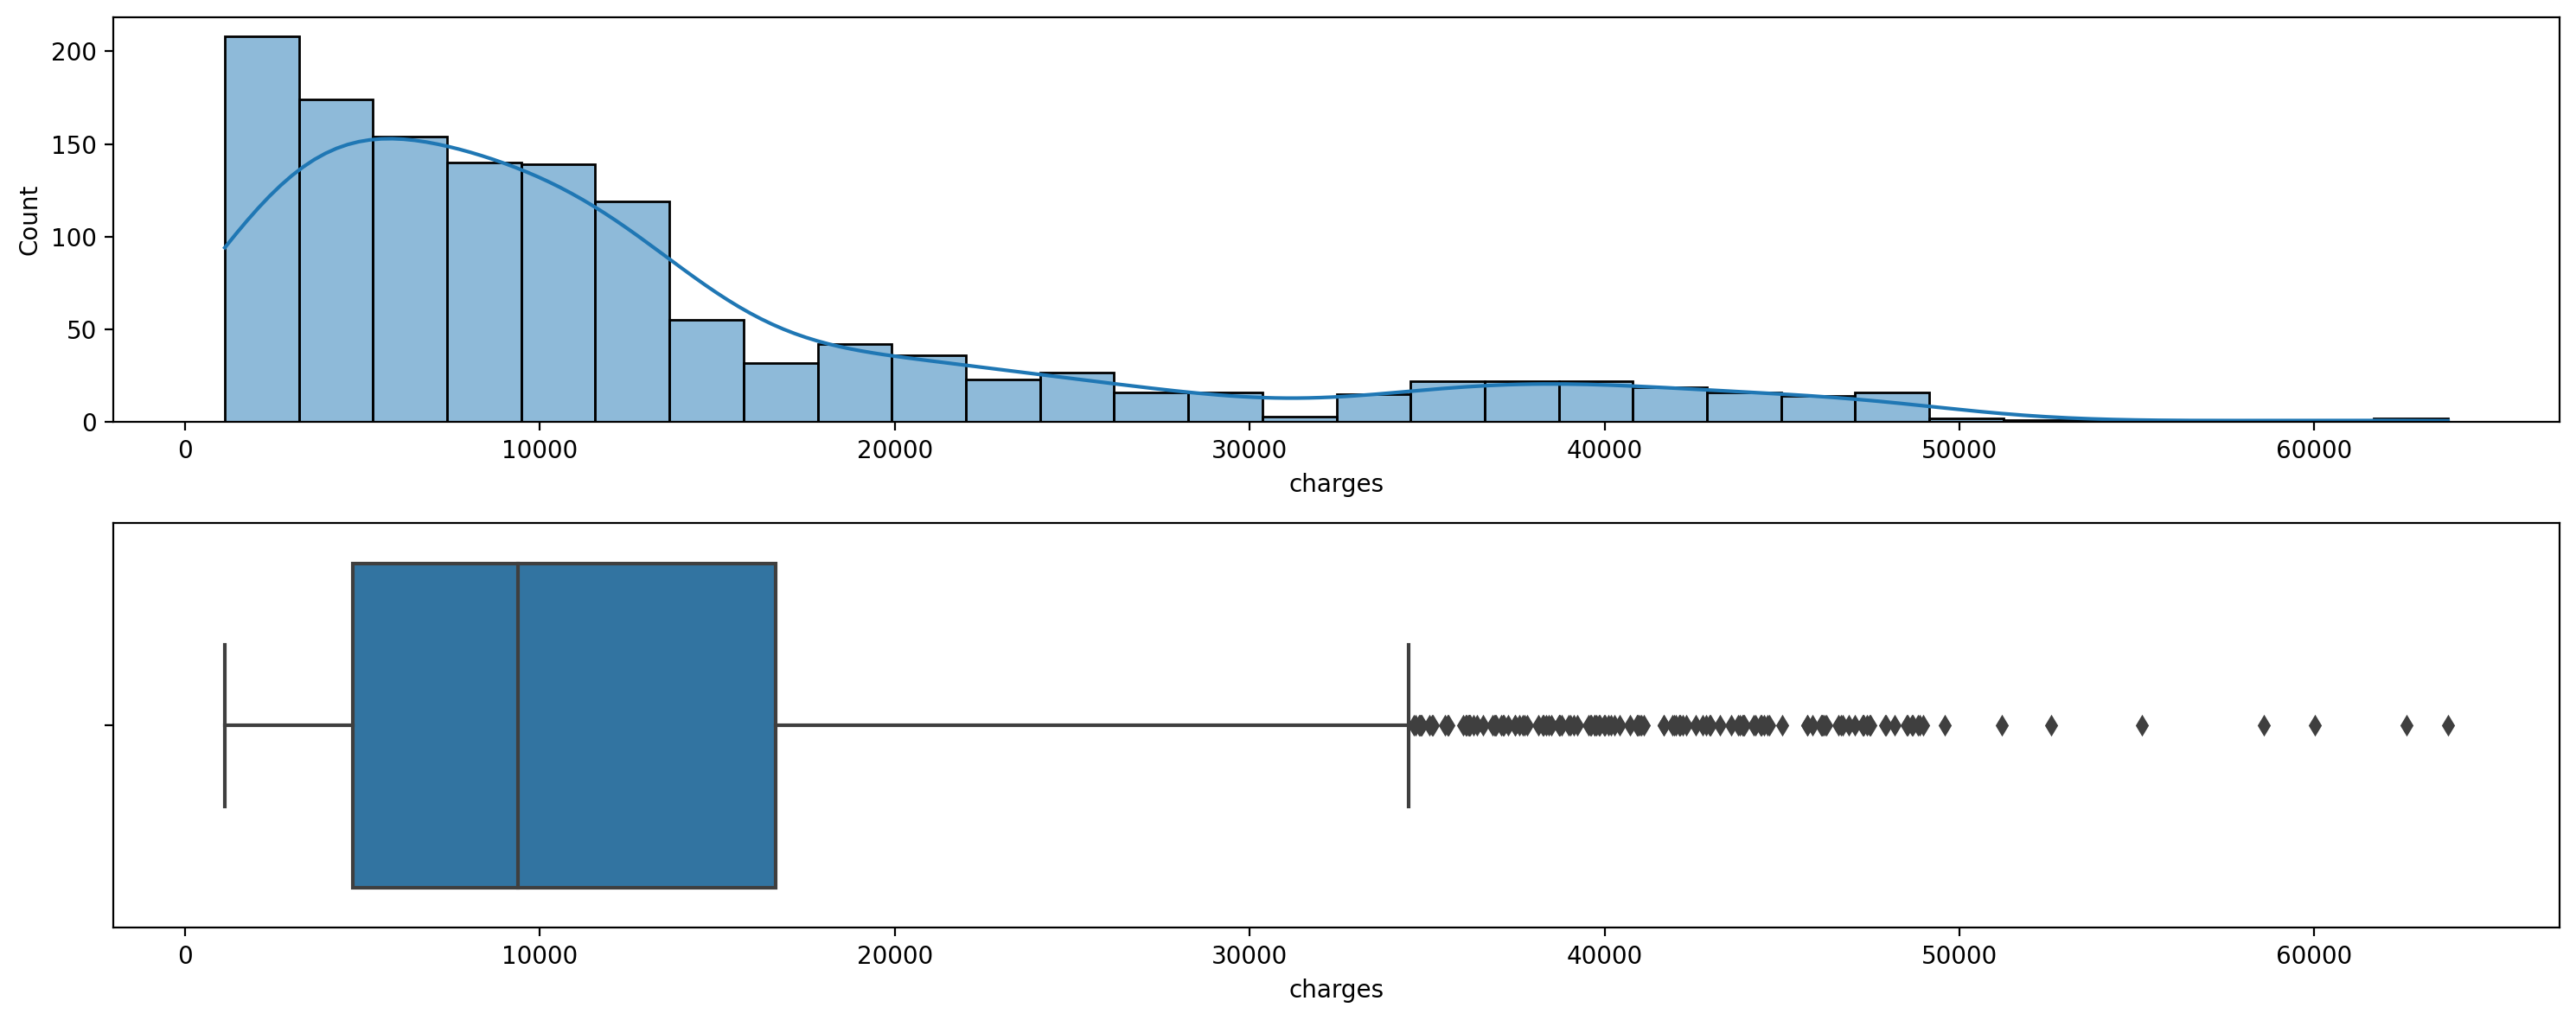

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

sns.histplot(data=data, x=target, kde=True, ax=axes[0])
sns.boxplot(data=data, x=target, ax=axes[1])

plt.tight_layout()
plt.show()

→ 이상치 짱많음 -> 모델 성능이 그다지 좋진 않을 것을 알 수 있음

### 1-1. 수치형 변수

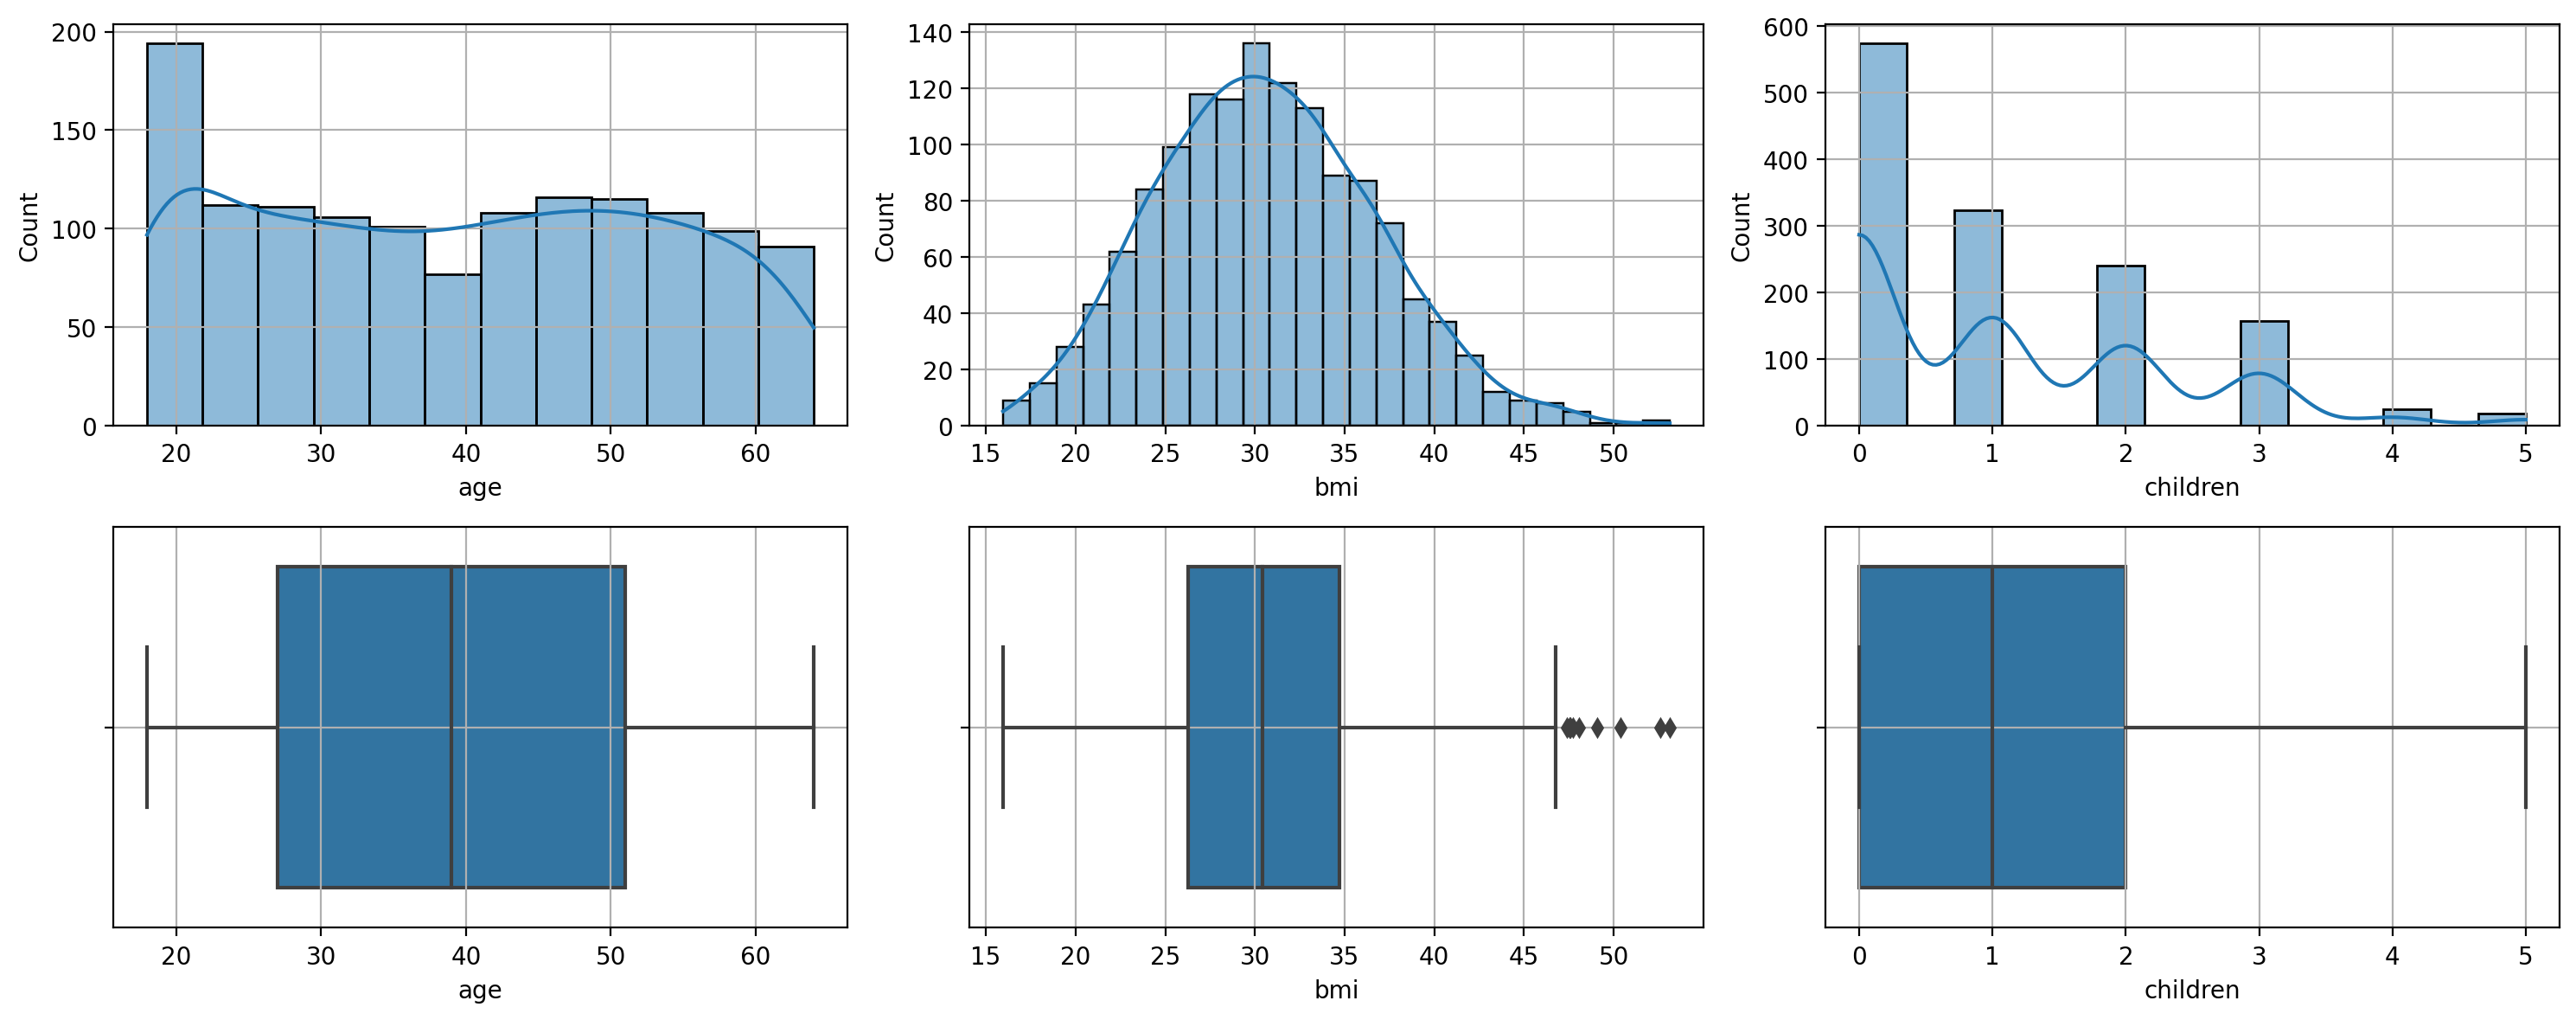

In [9]:
num_cols = ['age', 'bmi', 'children']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

for i, num_col in enumerate(num_cols):
    sns.histplot(data=data, x=num_col, kde=True, ax=axes[0, i])
    axes[0, i].grid()
    sns.boxplot(data=data, x=num_col, ax=axes[1, i])
    axes[1, i].grid()

plt.tight_layout()
plt.show()

### 1-2. 범주형 시각화

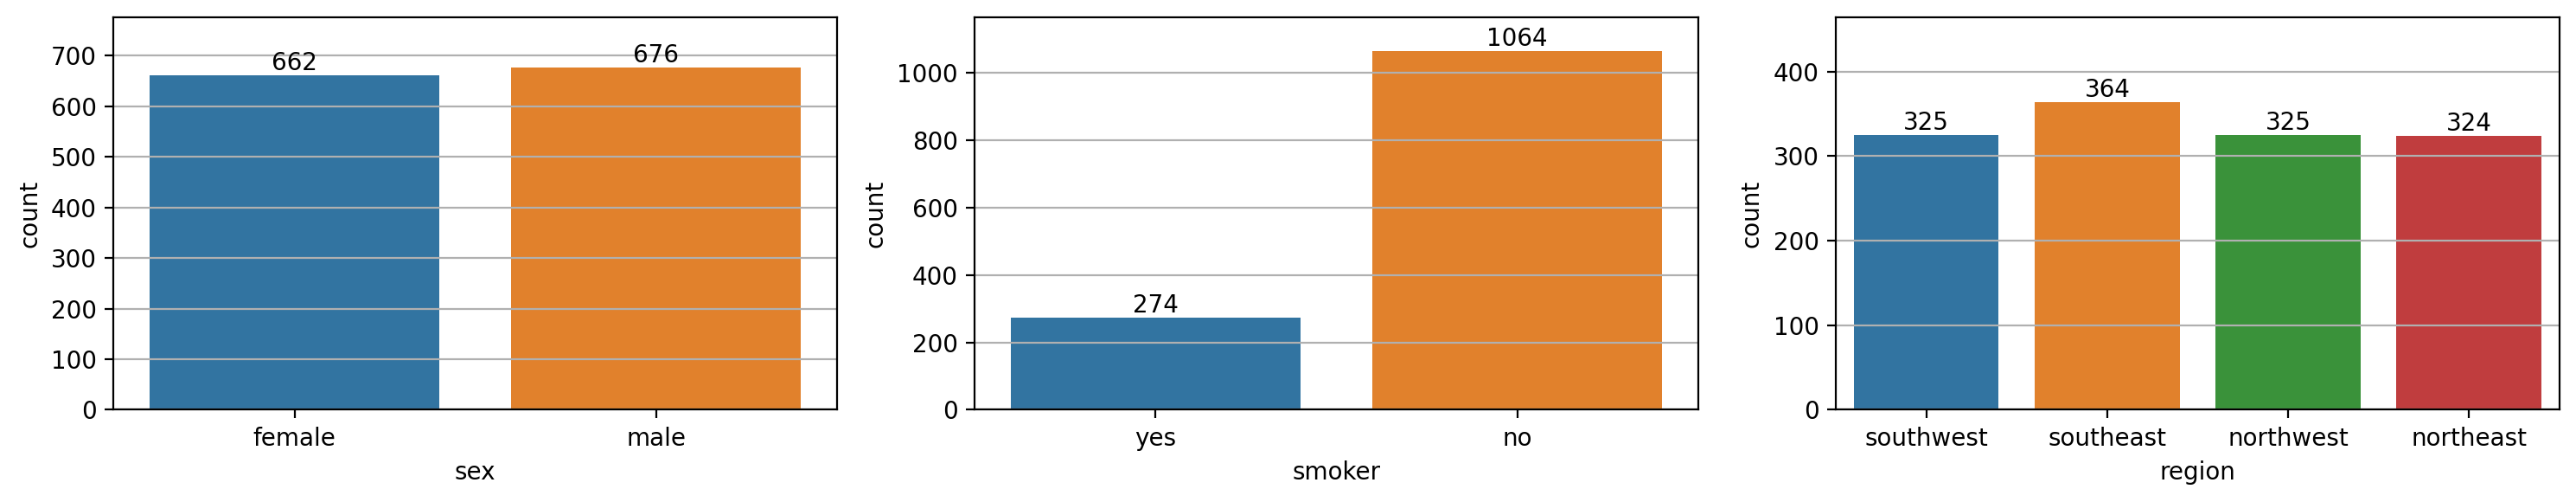

In [10]:
cate_cols = ['sex', 'smoker', 'region'] # → 차후 가변수화

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
i=0

for i, cate_col in enumerate(cate_cols):
    
    value_counts = data[cate_col].value_counts().reindex(data[cate_col].unique())
    
    sns.countplot(data=data, x=cate_col, ax=axes[i])
    axes[i].grid(axis='y')
    
    for idx, value in enumerate(value_counts):
        axes[i].annotate(text=str(value), xy=(idx, value), ha='center', va='bottom', fontsize=10)
    
    ylim_max = value_counts.max() + 100
    axes[i].set_ylim(0, ylim_max)

plt.tight_layout()
plt.show()

### 1-3. 상관관계 시각화

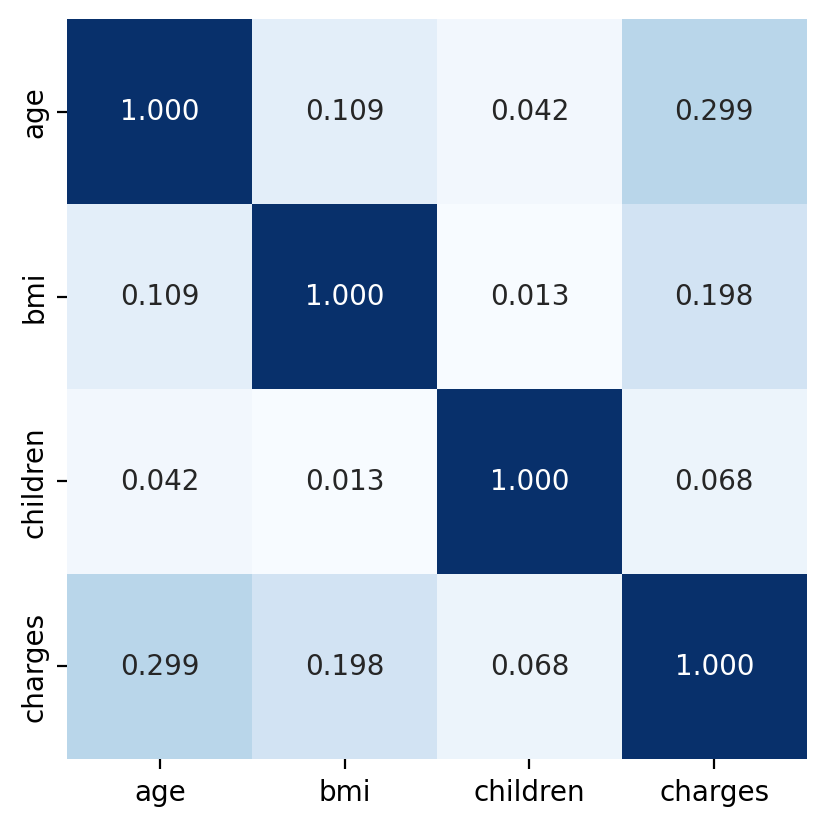

In [11]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr,
               annot=True,
               cmap='Blues',
               cbar=False,
               square=True,
            annot_kws={'size':10},
           fmt='.3f')
plt.show()

담배 많이 피면 의료비 많이 나오지 않을까?

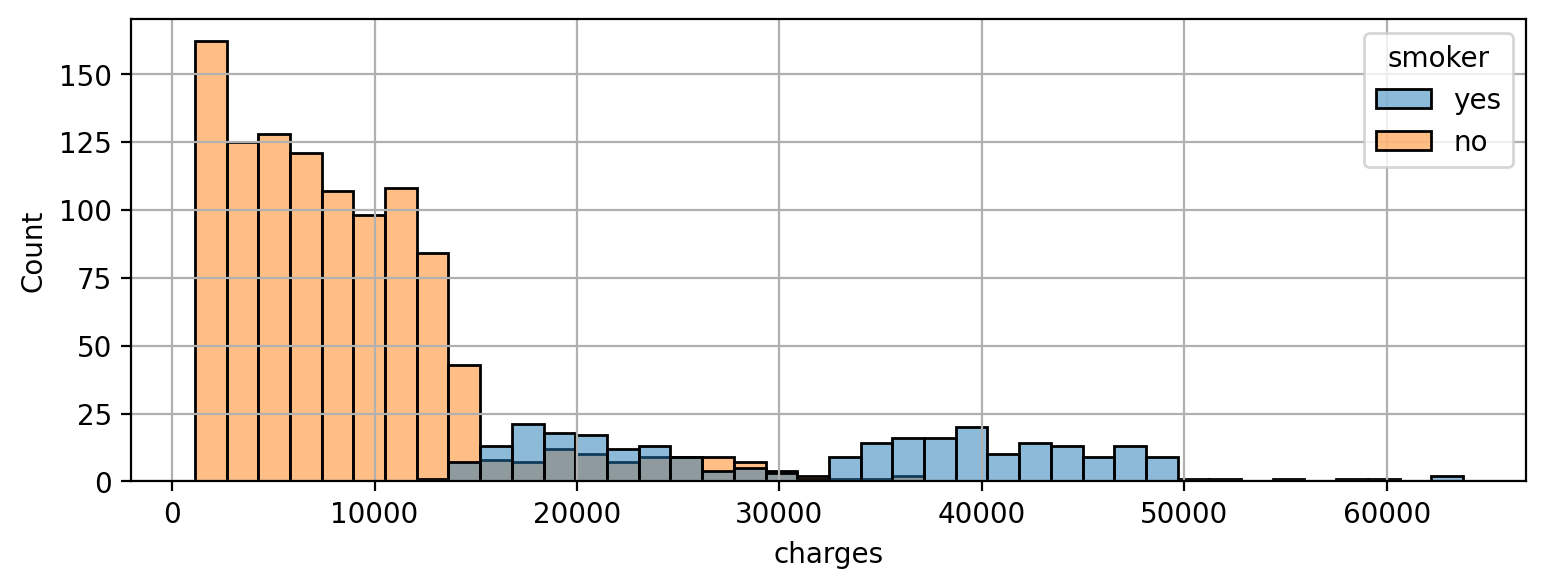

In [12]:
plt.figure(figsize=(9, 3))
sns.histplot(x='charges', hue='smoker', data=data, bins=40)
plt.grid()
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [14]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 가변수화**

In [ ]:
# 가변수화 대상: sex, smoker, region
dum_cols = ['sex', 'smoker', 'region']

# 가변수화
x = pd.get_dummies(dum_cols, )

# 확인


**3) 학습용, 평가용 데이터 분리**

In [ ]:
# 모듈 불러오기


# 데이터 분리


**4) 정규화**

In [ ]:
# 모듈 불러오기


# 정규화





# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [ ]:
# xgboost 설치
# !pip install xgboost

In [ ]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [ ]:
# 불러오기










**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기


In [ ]:
# 성능예측


In [ ]:
# 결과확인


In [ ]:
# 결과수집



**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기


In [ ]:
# 성능예측


In [ ]:
# 결과확인


In [ ]:
# 결과수집


**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기


In [ ]:
# 성능예측


In [ ]:
# 결과확인


In [ ]:
# 결과수집


**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기


In [ ]:
# 성능예측


In [ ]:
# 결과확인


In [ ]:
# 결과수집


**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기


In [ ]:
# 성능예측


In [ ]:
# 결과확인


In [ ]:
# 결과수집


**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기


In [ ]:
# 성능예측


In [ ]:
# 결과확인


In [ ]:
# 결과수집


# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [ ]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

In [ ]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [ ]:
# 기본 모델 선언


# 파라미터 지정
  # max_depth: range(1, 21)


# 모델 선언





In [ ]:
# 학습하기(많은 시간이 소요될 수 있음)


In [ ]:
# 최적 파라미터, 예측 최고 성능



In [ ]:
# 변수 중요도 시각화




# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [ ]:
# 예측하기


In [ ]:
# 성능평가

